### Initialize and connect to the database

In [336]:
%matplotlib inline
import pymongo as pm
import numpy as np
import matplotlib.pyplot as plt
import gridfs
import cPickle

dbname = 'acion_pred'
collname = 'action_pred_symmetric'
port = 27017
exp_id = 'test12'


conn = pm.MongoClient(port=27017)
db = conn[dbname][collname + '.files']
db.distinct('exp_id')

#r = conn['acion_pred']['action_pred_symmetric.files'].find({'exp_id': 'test3'})[1]
#r.keys('validation_results'')

def show_results(example):
    # Extract data from database
    q = {'exp_id' : exp_id, 'validation_results' : {'$exists' : True}}
    val_steps = db.find(q)
    val_count = val_steps.count()
    idx = val_steps[val_count-1]['_id']
    fn = db.find({'item_for' : idx})[0]['filename']
    fs = gridfs.GridFS(db.database, collname)
    fh = fs.get_last_version(fn)
    saved_data = cPickle.loads(fh.read())['validation_results']['valid0']
    fh.close()

    # Plot data
    fig = plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    fig = plt.gcf()
    ax = fig.gca()
    plt.imshow(saved_data['cur'][0][example])
    plt.title('Current Image')
    plt.axis('off')
    c_x = saved_data['act'][0][example][9]
    c_y = saved_data['act'][0][example][10]
    circle = plt.Circle((c_y, c_x), 5, color='r')
    ax.add_patch(circle)
    plt.subplot(1, 2, 2)
    plt.imshow(saved_data['fut'][0][example])
    plt.title('Future Image')
    plt.axis('off')

    pr  = saved_data['pred'][0][example]
    gt  = saved_data['act'][0][example]
    gtn = saved_data['norm'][0][example]
    l = 12
    # Show predicted and ground truth action
    print('                  |  predicted   | ground truth | gt normalized')
    print('----------------------------------------------------------------')
    #print('teleport:         | %f  |   %f' % (saved_data['pred'][0][example][0], saved_data['act'][0][example][0]))
    print('agent_vel_x:      | %s | %s |   %s ' % (str(pr[0]).center(l), str(gt[0]).center(l), str(gtn[0]).center(l)))
    print('agent_vel_y:      | %s | %s |   %s ' % (str(pr[1]).center(l), str(gt[1]).center(l), str(gtn[1]).center(l)))
    print('agent_vel_z:      | %s | %s |   %s ' % (str(pr[2]).center(l), str(gt[2]).center(l), str(gtn[2]).center(l)))
    print('agent_ang_vel_x:  | %s | %s |   %s ' % (str(pr[3]).center(l), str(gt[3]).center(l), str(gtn[3]).center(l)))
    print('agent_ang_vel_y:  | %s | %s |   %s ' % (str(pr[4]).center(l), str(gt[4]).center(l), str(gtn[4]).center(l)))
    print('agent_ang_vel_z:  | %s | %s |   %s ' % (str(pr[5]).center(l), str(gt[5]).center(l), str(gtn[5]).center(l)))
    print('action1_force_x:  | %s | %s |   %s ' % (str(pr[6]).center(l), str(gt[6]).center(l), str(gtn[6]).center(l)))
    print('action1_force_y:  | %s | %s |   %s ' % (str(pr[7]).center(l), str(gt[7]).center(l), str(gtn[7]).center(l)))
    #print('action1_force_z:  | %f  |   %f' % (saved_data['pred'][0][example][9], saved_data['act'][0][example][9]))
    #print('action1_torque_x: | %f  |   %f' % (saved_data['pred'][0][example][10], saved_data['act'][0][example][10]))
    print('action1_torque_y: | %s | %s |   %s ' % (str(pr[8]).center(l), str(gt[8]).center(l), str(gtn[8]).center(l)))
    #print('action1_torque_z: | %f  |   %f' % (saved_data['pred'][0][example][12], saved_data['act'][0][example][12]))
    print('action1_pos_x:    | %s | %s |   %s ' % (str(pr[9]).center(l), str(gt[9]).center(l), str(gtn[9]).center(l)))
    print('action1_pos_y:    | %s | %s |   %s ' % (str(pr[10]).center(l), str(gt[10]).center(l), str(gtn[10]).center(l)))
    print('----------------------------------------------------------------')
    print('Showing validation step %d, example %d\n' % (val_count, example))

### Plot training loss and learning rate

Training steps: 1400, epochs: 0


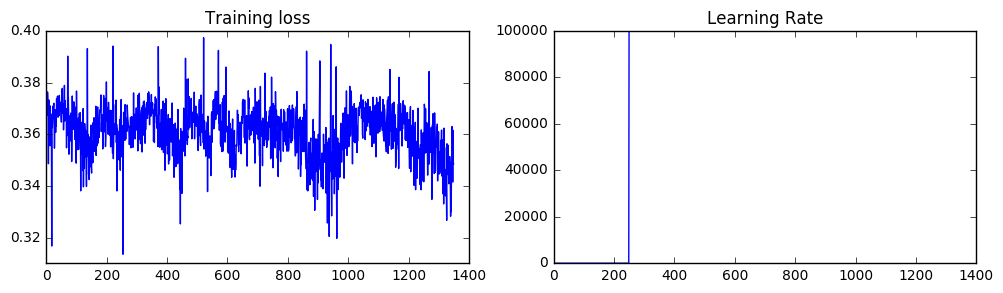

In [337]:
train_vec = np.concatenate([[(_r['loss'], _r['learning_rate']) for _r in r['train_results']] 
                            for r in db.find({'exp_id': exp_id, 'train_results': {'$exists': True}})])

N = 2048000
batch_size = 256
steps = len(train_vec)
epoch = steps * batch_size / N
print("Training steps: %d, epochs: %d" % (steps, epoch))

_N = 50
fig = plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(train_vec[_N:, 0])
plt.title('Training loss')
plt.subplot(1, 2, 2)
plt.plot(train_vec[_N:, 1])
plt.title('Learning Rate')

#plt.gca().set_xscale('log')

### Show last image-action pairs

                  |  predicted   | ground truth | gt normalized
----------------------------------------------------------------
agent_vel_x:      |  0.0236594   |     0.0      |       0.0      
agent_vel_y:      |  0.0122495   |     0.0      |    0.0128966   
agent_vel_z:      |     0.0      |     0.0      |    -0.444521   
agent_ang_vel_x:  |  0.00441984  |   0.013954   |     0.250727   
agent_ang_vel_y:  |  0.0128794   |     0.0      |    -0.0330769  
agent_ang_vel_z:  |  0.0145414   |  0.0307586   |     0.730695   
action1_force_x:  |  0.00769028  |     0.0      |    0.0626023   
action1_force_y:  |  0.0225179   |     0.0      |     -0.36411   
action1_torque_y: |  0.0156139   |     0.0      |     0.190285   
action1_pos_x:    |    0.0186    |     0.0      |    -0.668213   
action1_pos_y:    |  0.0107213   |     0.0      |    -0.612842   
----------------------------------------------------------------
Showing validation step 3, example 0



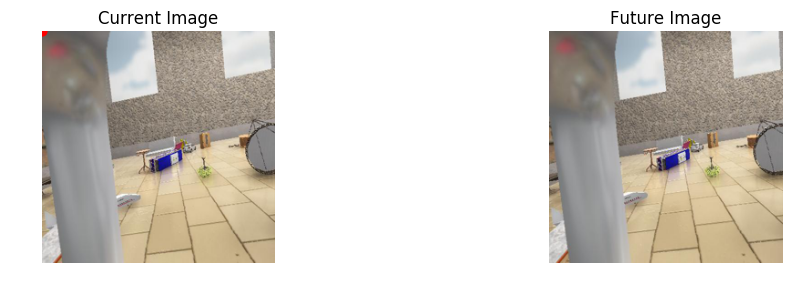

In [338]:
# Pick example
example = 0
show_results(example)

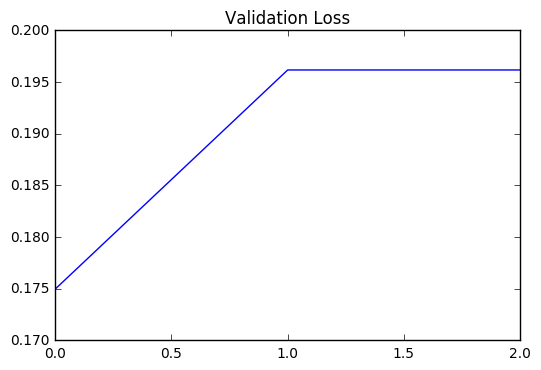

In [339]:
#Extract validation loss from database
q = {'exp_id' : exp_id, 'validation_results' : {'$exists' : True}}
val_steps = db.find(q)
val_count = val_steps.count()
loss = []
for val in range(val_count):
    idx = val_steps[val]['_id']
    fn = db.find({'item_for' : idx})[0]['filename']
    fs = gridfs.GridFS(db.database, collname)
    fh = fs.get_last_version(fn)
    loss.append(cPickle.loads(fh.read())['validation_results']['valid0']['val_loss'])
    fh.close()


#test_vec = [r['validation_results']['valid0']['loss'] for r in db.find({'exp_id': exp_id,
#                                                                        'validation_results': {'$exists': True}})]
#_N = 1
plt.plot(loss)
#plt.gca().set_xscale('log')
plt.title('Validation Loss')